# Paper

In [1]:
import numpy as np
import tqdm as tqdm
H_array = np.linspace(3,8,6)
B_array = np.linspace(0,10,6)
ne_array = np.linspace(15,23,6)
Te_array = np.linspace(2,15,6)

In [2]:
import numpy as np

# Define the path to your text file
file_path = "/mnt/c/Users/pedro/Documents/GitHub/Cooling/cooling_table_33_001.txt"

# Initialize an empty list to store the last values
#cooling_array = np.zeros((len(H_array), len(B_array), len(ne_array), len(Te_array)))
cooling_array = []
count = 0
# Open the file in read mode
with open(file_path, 'r') as file:
    next(file)
    # Iterate over each line in the file
    for line in file:
        # Split the line into individual values
        values = line.strip().split()
        # Extract the last value and convert it to the appropriate data type
        last_value = float(values[-1])  # Assuming the last value is the fifth value
        # Append the last value to the list
        #l = count % len(Te_array)
        #k = (count // len(Te_array)) % len(ne_array)
        #j = (count // (len(ne_array) * len(Te_array))) % len(B_array)
        #i = count // (len(B_array) * len(ne_array) * len(Te_array))
        #cooling_array[i][j][k][l] = last_value
        cooling_array.append(last_value)
        #print(i,j,k,l)
        #count = count + 1
cooling_array = np.array(cooling_array)
print(cooling_array.shape)

(1296,)


In [266]:
cooling_array

array([-1.75589821,  5.59059313,  6.89284071, ..., 20.2556072 ,
       30.6556079 , 41.0556074 ])

In [157]:
#find deltaQ and deltaH
deltaQmax = 0
deltaQarray = []
deltaHarray = []
deltaH = 0
for j in (range(len(B_array))):
    for k in range(len(ne_array)):
        for l in range (len(Te_array)):
            for i in range(len(H_array)):
                d4_index_fixed = l + len(Te_array) * (k + len(ne_array) * (j + len(B_array) * i))
                for z in range(i+1, len(H_array)):
                    d4_index = l + len(Te_array) * (k + len(ne_array) * (j + len(B_array) * z))
                    deltaQ = np.abs(cooling_array[d4_index] - cooling_array[d4_index_fixed])
                    if (deltaQ > deltaQmax):
                        deltaQmax = deltaQ
                        deltaH = H_array[z] - H_array[i]
                    #print("Index = ", d4_index, "H = ", H_array[i], "B = ", B_array[j], "ne = ", ne_array[k], "Te = ", Te_array[l], "Cooling = ", cooling_array[d4_index])
            deltaQarray.append(deltaQmax)
            deltaHarray.append(deltaH)
            deltaQmax = 0
            deltaH = 0
deltaQarray = np.array(deltaQarray)
deltaHarray = np.array(deltaHarray)

In [128]:
cooling_array[0][0][0][4]

-20.2719114

In [156]:
print(len(deltaQmaxarray.flatten()))
print(len(deltaHarray))

35937
39172


In [94]:
#find the value of Q as a function of H
H_array_plot = []
Q_array_plot = []
for i in range(len(H_array)):
    for j in (range(len(B_array))):
        for k in range(len(ne_array)):
            for l in range (len(Te_array)):
                d4_index = l + len(Te_array) * (k + len(ne_array) * (j + len(B_array) * i))
                Q_array_plot = cooling_array[d4_index]
                H_array_plot.append(H_array[i])

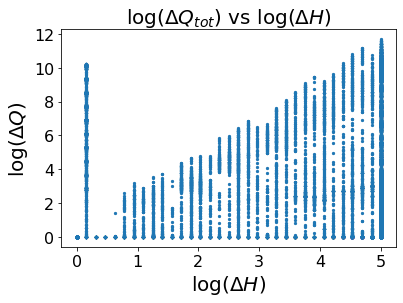

In [178]:
import matplotlib.pyplot as plt

plt.scatter(deltaHarray, deltaQarray, s = 5)

plt.xlabel(r'log($\Delta H$)', fontsize = 20)
plt.ylabel(r'log($\Delta Q$)', fontsize = 20)
plt.title(r'log($\Delta Q_{tot}$) vs log($\Delta H$)', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()


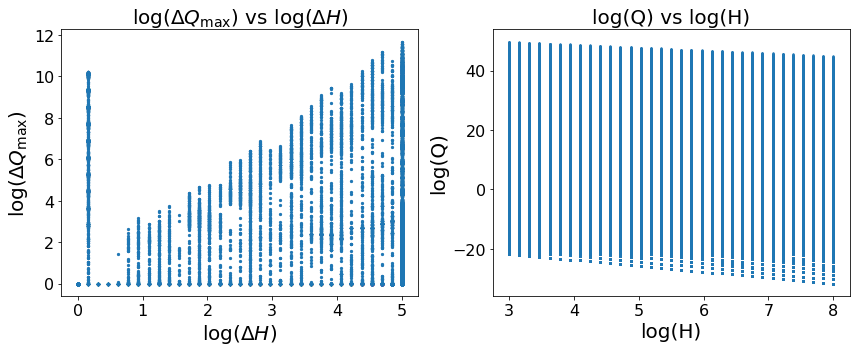

In [175]:
import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: scatter plot of deltaQarray and deltaHarray
axs[0].scatter(deltaHarray, deltaQarray, s=5)
axs[0].set_xlabel(r'log($\Delta H$)', fontsize=20)
axs[0].set_ylabel(r'log($\Delta Q_{\rm max}$)', fontsize=20)
axs[0].set_title(r'log($\Delta Q_{\rm max}$) vs log($\Delta H$)', fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=16)

# Second subplot: scatter plot of Q_array_plot and H_array_plot
axs[1].scatter(H_array_plot, Q_array_plot, s=2)
axs[1].set_xlabel(r'log(H)', fontsize=20)
axs[1].set_ylabel(r'log(Q)', fontsize=20)
axs[1].set_title('log(Q) vs log(H)', fontsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
tcool = cooling_array
kb = 1.3806504e-16
for count in range(len(H_array)**4):
    l = count % len(Te_array)
    k = (count // len(Te_array)) % len(ne_array)
    j = (count // (len(ne_array) * len(Te_array))) % len(B_array)
    i = count // (len(B_array) * len(ne_array) * len(Te_array))
    tcool[count] = np.log10((10**(ne_array[k]) * 1.3806504e-16 * 10**(Te_array[l]))/10**(cooling_array[count]))

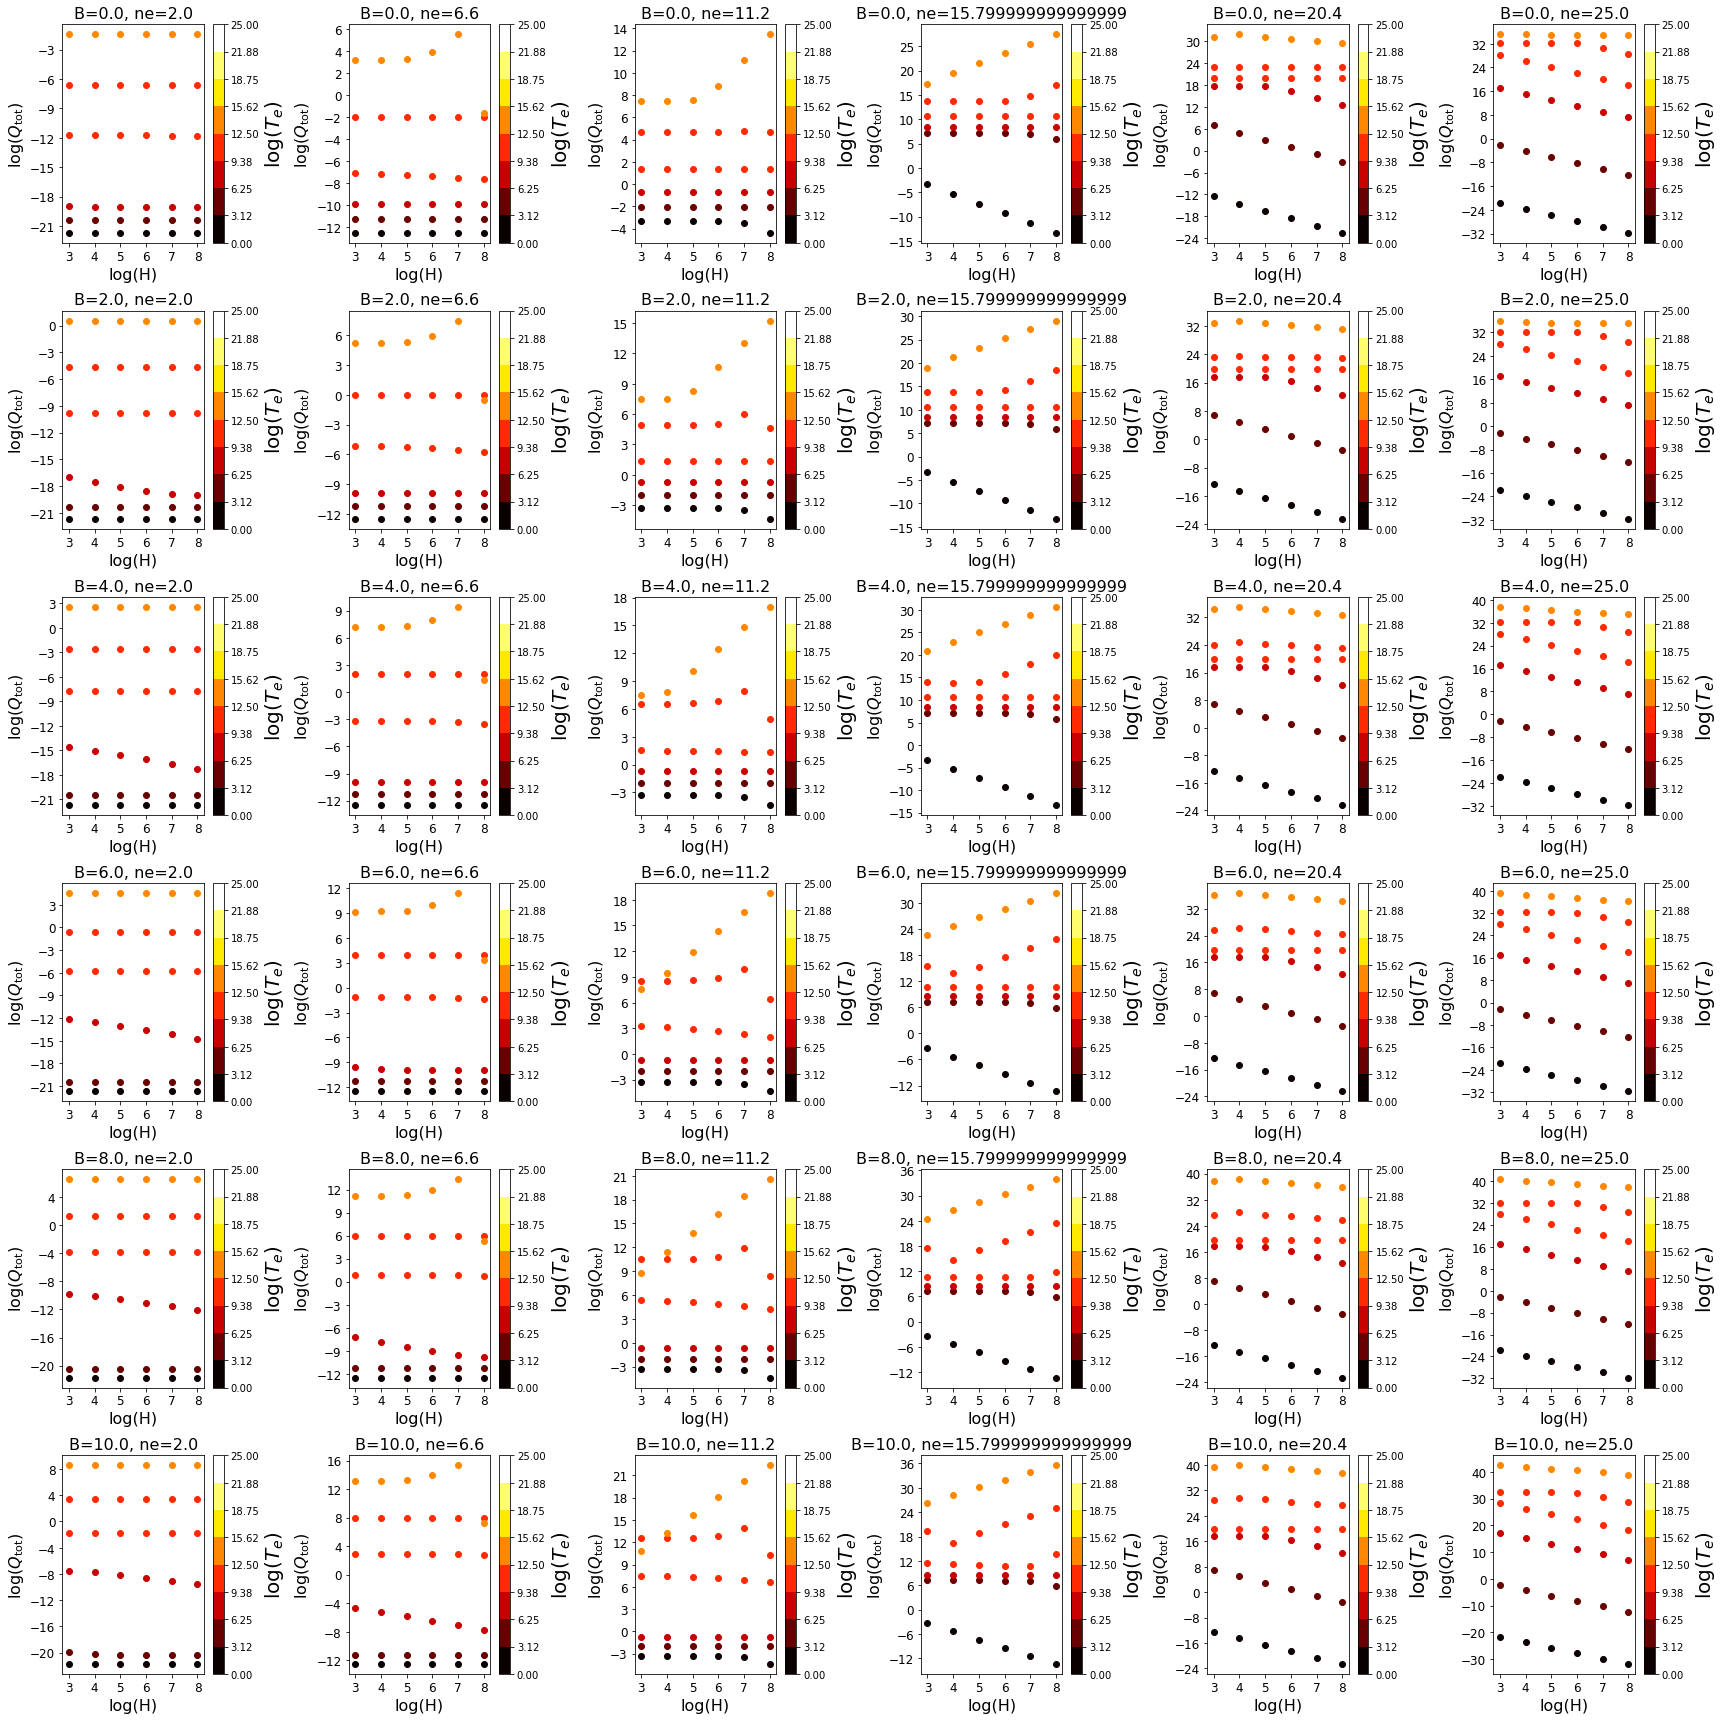

In [206]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable

# Assuming you have H_array and cooling_array defined

# Normalize count values
total_count = len(H_array) ** 4

# Create a list of boundaries for 8 color sections
boundaries = np.linspace(0, 25, 9)

# Create a BoundaryNorm instance to specify the boundaries of each color section
norm = BoundaryNorm(boundaries, ncolors=256)

# Create a 6x6 grid of plots
fig, axs = plt.subplots(6, 6, figsize=(24, 24))

# Loop over each combination of B and ne
for iB in range(len(B_array)):
    for ine in range(len(ne_array)):
        ax = axs[iB, ine]

        # Plot the scatter plot
        for i in range(len(H_array)):
            for l in range(len(Te_array)):
                d4_index = l + len(Te_array) * (ine + len(ne_array) * (iB + len(B_array) * i))
                ax.scatter(H_array[i], cooling_array[d4_index], c=Te_array[l], cmap='hot', norm=norm)

        # Create a ScalarMappable object for colorbar
        sm = ScalarMappable(cmap='hot', norm=norm)
        sm.set_array([])  # This line is necessary for ScalarMappable to work correctly

        # Add colorbar
        cbar = plt.colorbar(sm, ax=ax, boundaries=boundaries, ticks=np.linspace(0, 25, 9))
        cbar.set_label(r'log($T_e$)', fontsize=20)

        # Set title and labels
        ax.set_title(f'B={B_array[iB]}, ne={ne_array[ine]}', fontsize=16)
        ax.set_xlabel(r'log(H)', fontsize=16)
        ax.set_ylabel(r'log($Q_{\rm tot}$)', fontsize=16)

        # Increase size of ticks
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

# Save the image
plt.savefig('Qtot_H.png', dpi=300)
plt.show()


In [4]:
G_const = 6.67259e-8
c_const = 2.99792458e10
me_cgs = 9.1094e-28
solarmass = 1.99e33
mp_cgs = 1.673534e-24
thomson_cgs = 6.652e-25
Mbh = 10 * solarmass
rg = G_const * Mbh/c_const**2
vk = (G_const * Mbh/(5 * rg))**(1/2)
mdot = np.zeros((len(ne_array)))
for i in range(len(ne_array)):
    Mdot = me_cgs * 10**ne_array[i] * 0.1 * vk * 4 * np.pi * (5 * rg)**2
    mdot[i] = Mdot/(4 * np.pi * G_const * Mbh * mp_cgs/( 0.1 * thomson_cgs * c_const))

In [12]:
print(mdot)
print(ne_array)
Mdot2 = np.zeros((len(ne_array)))
for i in range(len(ne_array)):
    Mdot2[i] = (me_cgs * 10**ne_array[i] * (0.007 * c_const) * 209 * 4 * np.pi * (5*rg)**2)/(4 * np.pi * G_const * Mbh * mp_cgs/( 0.1 * thomson_cgs * c_const))
print(Mdot2)

[5.98092822e-08 2.38105041e-06 9.47913243e-05 3.77371059e-03
 1.50234125e-01 5.98092822e+00]
[15.  16.6 18.2 19.8 21.4 23. ]
[1.95658139e-06 7.78929082e-05 3.10097253e-03 1.23451940e-01
 4.91471025e+00 1.95658139e+02]


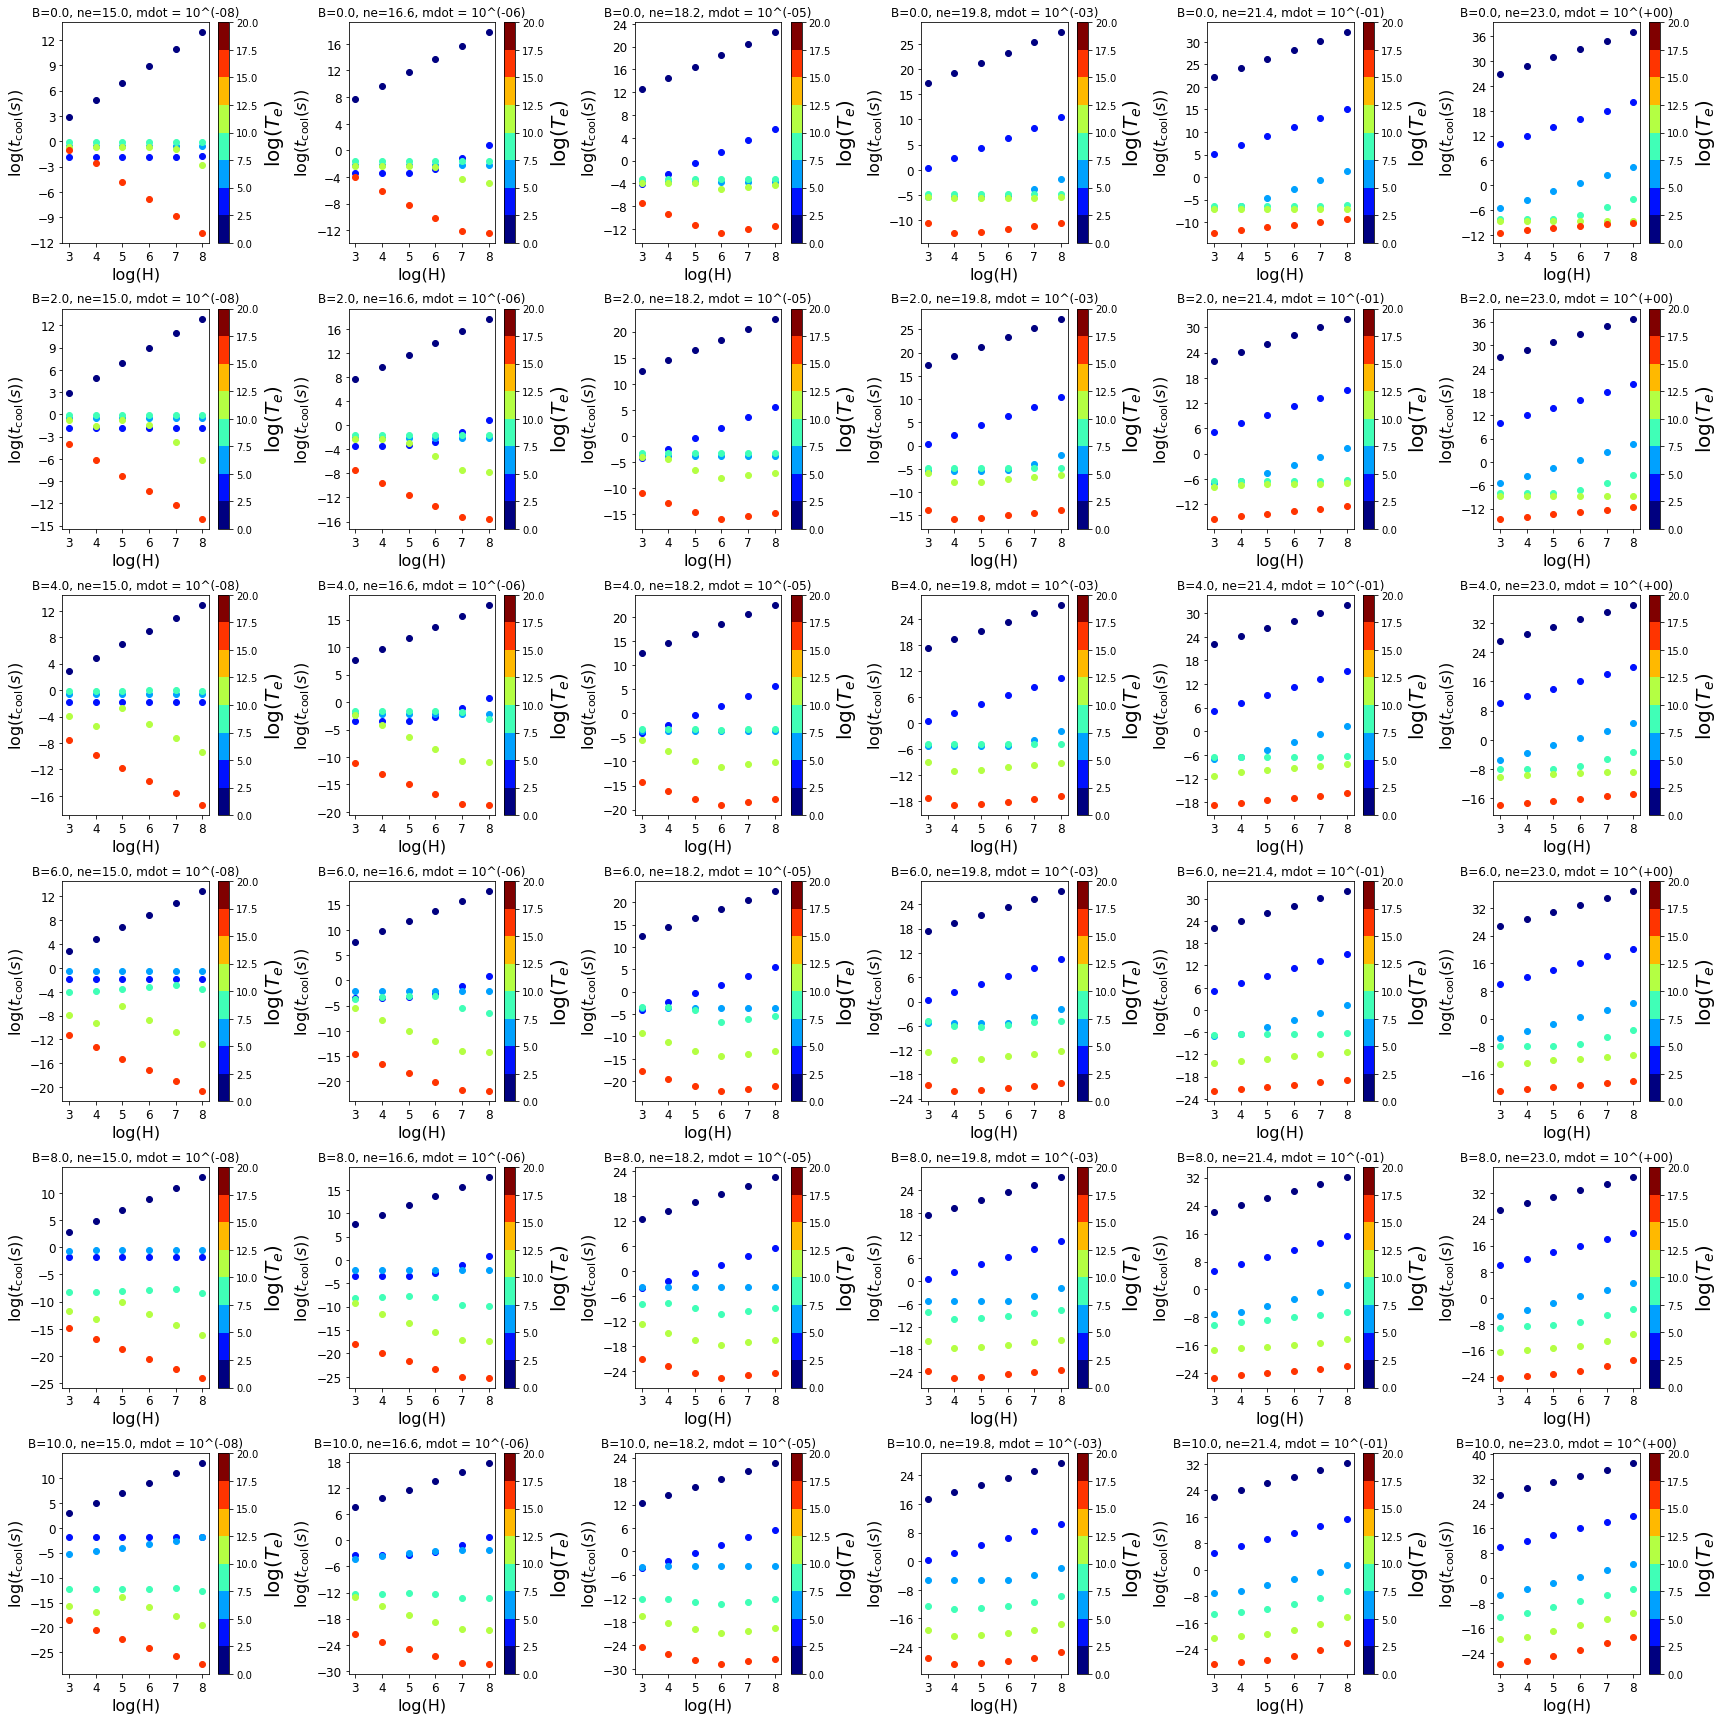

In [270]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable


# Assuming you have H_array and cooling_array defined

# Normalize count values
total_count = len(H_array) ** 4

# Create a list of boundaries for 8 color sections
boundaries = np.linspace(0, 20, 9)

# Create a BoundaryNorm instance to specify the boundaries of each color section
norm = BoundaryNorm(boundaries, ncolors=256)

# Create a 6x6 grid of plots
fig, axs = plt.subplots(6, 6, figsize=(24, 24))

# Loop over each combination of B and ne
for iB in range(len(B_array)):
    for ine in range(len(ne_array)):
        ax = axs[iB, ine]

        # Plot the scatter plot
        for i in range(len(H_array)):
            for l in range(len(Te_array)):
                d4_index = l + len(Te_array) * (ine + len(ne_array) * (iB + len(B_array) * i))
                ax.scatter(H_array[i], cooling_array[d4_index], c=Te_array[l], cmap='jet', norm=norm)

        # Create a ScalarMappable object for colorbar
        sm = ScalarMappable(cmap='jet', norm=norm)
        sm.set_array([])  # This line is necessary for ScalarMappable to work correctly

        # Add colorbar
        cbar = plt.colorbar(sm, ax=ax, boundaries=boundaries, ticks=np.linspace(0, 20, 9))
        cbar.set_label(r'log($T_e$)', fontsize=20)
        mdot_str = '{:.1e}'.format(mdot[ine])
        mdot_notation = mdot_str.split('e')[1] 
        # Set title and labels
        ax.set_title(f'B={B_array[iB]}, ne={ne_array[ine]:.1f}, mdot = 10^({mdot_notation})', fontsize=12)
        ax.set_xlabel(r'log(H)', fontsize=16)
        ax.set_ylabel(r'log($t_{\rm cool} (s)$)', fontsize=16)

        # Increase size of ticks
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

# Save the image
plt.savefig('tcool_H.png', dpi=300)
plt.show()


In [242]:
#ax.set_title(f'B={B_array[iB]}, ne={ne_array[ine]:.1f}, mdot = 10^{mdot_notation}', fontsize=16)

array([5.98092822e-21, 2.38105041e-16, 9.47913243e-12, 3.77371059e-07,
       1.50234125e-02, 5.98092822e+02])

In [238]:
ne_array

array([ 2. ,  6.6, 11.2, 15.8, 20.4, 25. ])